In [65]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import numpy as np
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

In [66]:
# Load the pretrained model and processor
model = VisionEncoderDecoderModel.from_pretrained("openthaigpt/thai-trocr")
processor = TrOCRProcessor.from_pretrained("openthaigpt/thai-trocr")

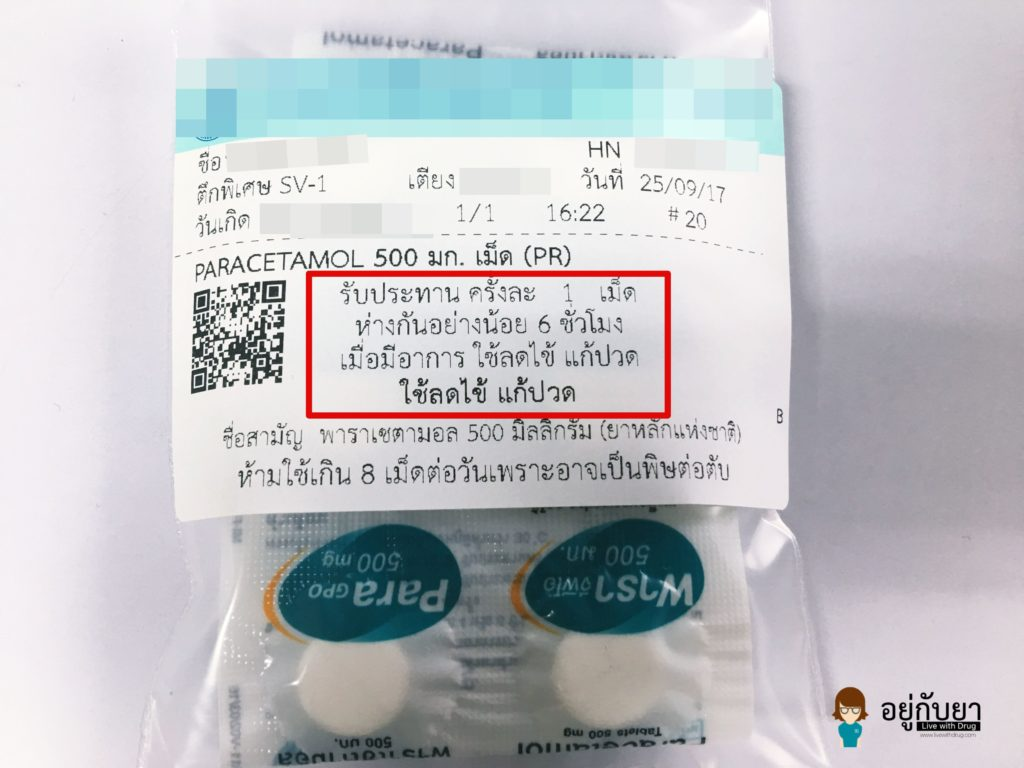

In [ ]:
img = cv2.imread("../images/para.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

checkimg = Image.fromarray(img)
checkimg

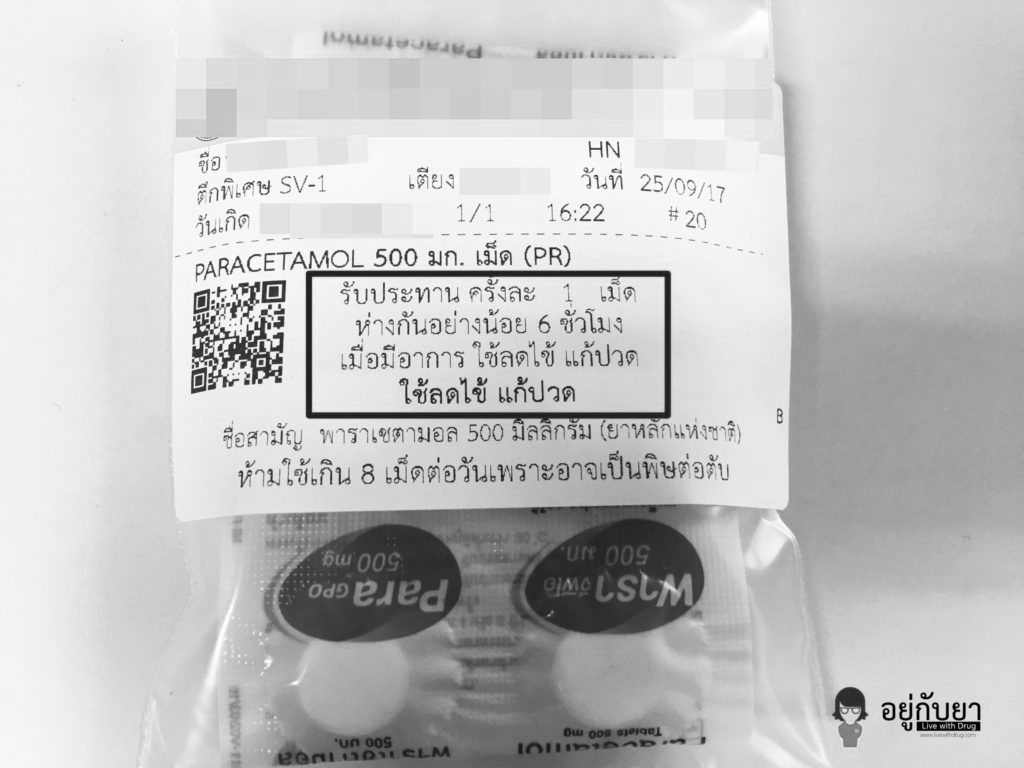

In [68]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
checkimg = Image.fromarray(gray).convert("RGB")
checkimg

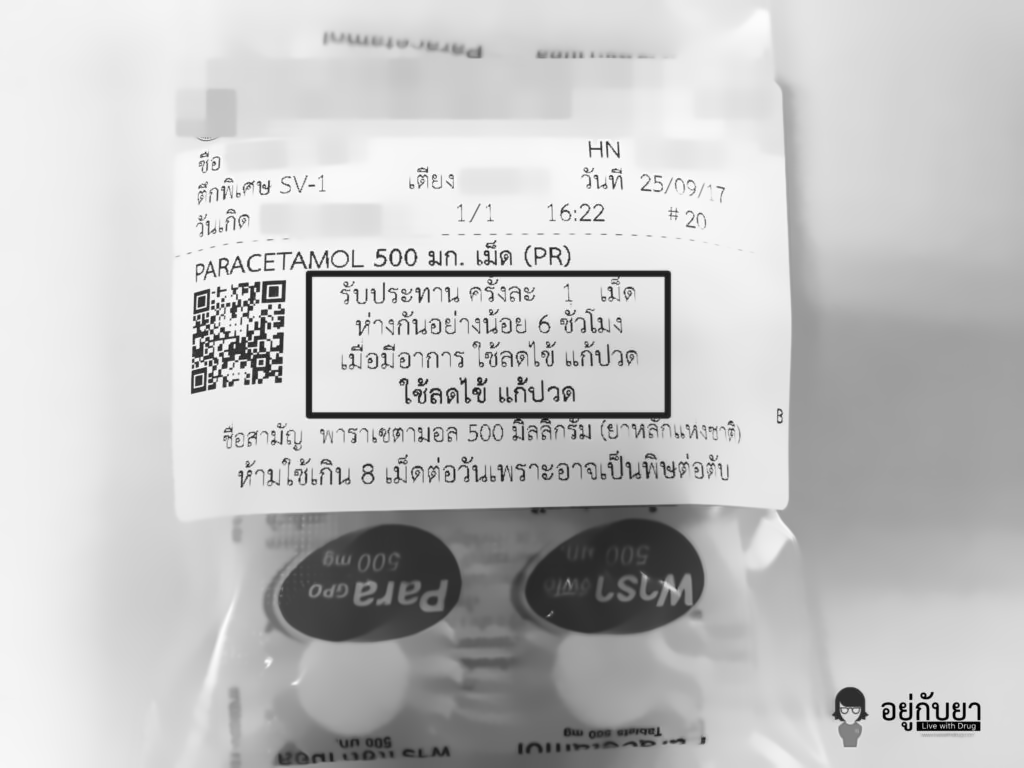

In [69]:
# Denoise
gray = cv2.fastNlMeansDenoising(gray, h=12)

checkimg = Image.fromarray(gray).convert("RGB")
checkimg

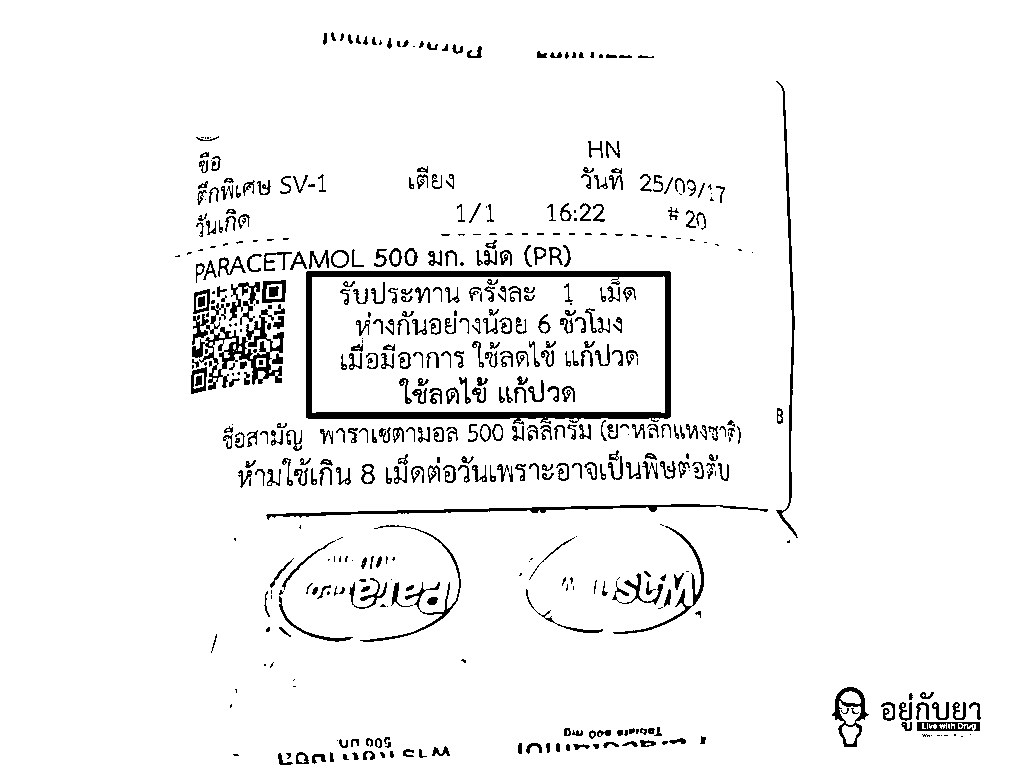

In [81]:
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 15, 11
)

imgshow = Image.fromarray(thresh).convert("RGB")
imgshow

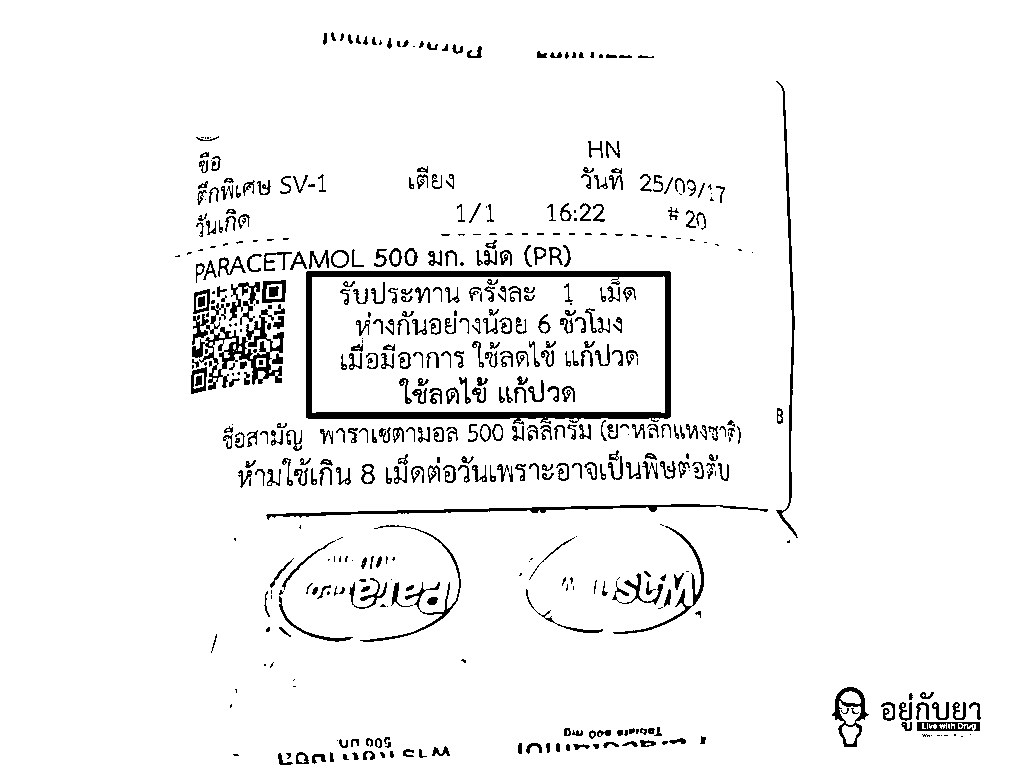

In [76]:
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((1, 1), np.uint8))

final = Image.fromarray(clean).convert("RGB")
final

In [72]:
pixel_values = processor(images=img, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

ฐ


In [73]:
# # Adaptive threshold
# thresh = cv2.adaptiveThreshold(
#     gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     cv2.THRESH_BINARY, 11, 2
# )

# # Increase contrast (alpha >1 increases contrast, beta shifts brightness)
# alpha = 1.8 # contrast factor
# beta = 1     # brightness shift
# gray = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)

# # Morphological operations
# kernel = np.ones((2,2), np.uint8)
# clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# # clean = cv2.bitwise_not(clean)